In [1]:
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os

RESULTS_PATH = 'results/passengers/'

# Get all of the result files for the notebooks
results = []
for root, dirs, files in os.walk(RESULTS_PATH):
    for file in files:
        if file.endswith('.csv'):  # Must be a CSV
            results.append(file)

In [3]:
# Bar chart for a single notebook
def plot_bar(notebook):
    df = pd.read_csv(RESULTS_PATH + notebook + '.csv')

    df = df[df['model'] != 'SGD']
    # df = df[df['model'] != 'RNNMultiple']
    # df = df[df['model'] != 'RNNAll']

    df.plot(x='model', y=['train', 'test'], kind='bar', title=notebook, figsize=(15, 10), legend=True, fontsize=12)
    plt.ylabel('MAE Loss (Mean Average Error)')
    plt.show()
    
    df.sort_values(['test'], inplace=True)
    print(df)

In [4]:
# Line chart for models across a set of notebooks
def plot_line(notebooks, ignore=None):
    df_all = pd.DataFrame()

    for notebook in notebooks:
        df = pd.read_csv(RESULTS_PATH + notebook + '.csv')
        df = df[df['model'] != 'SGD']
        # df = df[df['model'] != 'RNNMultiple']
        # df = df[df['model'] != 'RNNAll']
        
        if ignore is not None:
            for ign in ignore:
                df = df[df['model'] != ign]
                
        models = list(df['model'].unique())

        append_object = {'notebook': notebook}
        for model in models:
            append_object[model] = df[df['model'] == model]['test'].values[0]
        df_all = df_all.append(append_object, ignore_index=True)

    df_all.plot(x='notebook', figsize=(15, 10), legend=True, fontsize=12)
    plt.show()

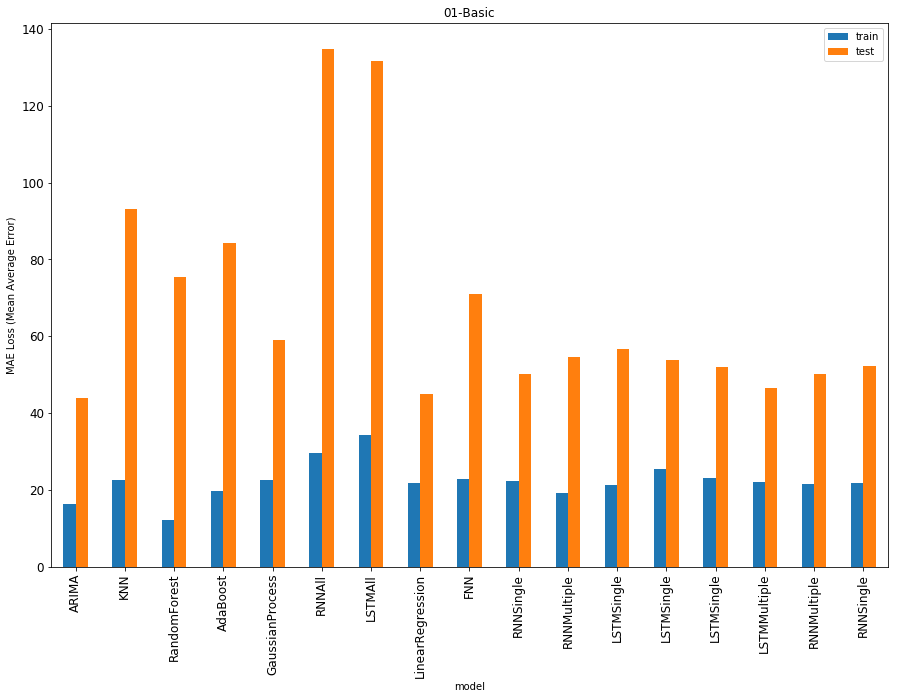

               model        test      train
0              ARIMA   43.880789  16.301978
8   LinearRegression   44.882682  21.717891
15      LSTMMultiple   46.442446  22.119879
10         RNNSingle   50.204569  22.407406
16       RNNMultiple   50.228593  21.454642
14        LSTMSingle   51.968473  23.082868
17         RNNSingle   52.332394  21.693593
13        LSTMSingle   53.896139  25.456885
11       RNNMultiple   54.577814  19.129006
12        LSTMSingle   56.580446  21.255734
5    GaussianProcess   59.046433  22.663102
9                FNN   71.036013  22.724362
3       RandomForest   75.525032  12.256727
4           AdaBoost   84.281556  19.582246
1                KNN   93.049225  22.645952
7            LSTMAll  131.800083  34.411994
6             RNNAll  134.823140  29.559202


In [5]:
plot_bar('01-Basic')

# Chunk Data

In [ ]:
plot_line(['02-Chunk1', '02-Chunk2', '02-Chunk3', '02-Chunk4', '02-Chunk5'])

In [ ]:
plot_line(['02-Chunk1', '02-Chunk2', '02-Chunk3', '02-Chunk4', '02-Chunk5'], ignore=['RNNSingle', 'FNN'])

In [ ]:
plot_bar('02-Chunk1')

In [ ]:
plot_bar('02-Chunk2')

In [ ]:
plot_bar('02-Chunk3')

In [ ]:
plot_bar('02-Chunk4')

In [ ]:
plot_bar('02-Chunk5')

# Features

### <YYYY, MM, DD>

In [ ]:
plot_line(['03-FeaturesDate', '03-FeaturesDate_n', '03-FeaturesDate_p', '03-FeaturesDate_pn'])

Going to ignore the red model (GaussianProcess) due to it causing the scale for other models to be barely visible.

In [ ]:
plot_line(['03-FeaturesDate', '03-FeaturesDate_n', '03-FeaturesDate_p', '03-FeaturesDate_pn'], ignore=['GaussianProcess'])

In [ ]:
plot_bar('03-FeaturesDate')

In [ ]:
plot_bar('03-FeaturesDate_n')

In [ ]:
plot_bar('03-FeaturesDate_p')

In [ ]:
plot_bar('03-FeaturesDate_pn')

### <actual_min_temp, actual_max_temp, actual_precipitation>

In [ ]:
plot_line(['03-FeaturesOther', '03-FeaturesOther_n', '03-FeaturesOther_p', '03-FeaturesOther_pn'])

Going to ignore a bunch of models from the top to be able to see the bottom ones that are on a smaller scale

In [ ]:
plot_line(['03-FeaturesOther', '03-FeaturesOther_n', '03-FeaturesOther_p', '03-FeaturesOther_pn'], ignore=['GaussianProcess', 'RNNSingle', 'FNN'])

In [ ]:
plot_bar('03-FeaturesOther')

In [ ]:
plot_bar('03-FeaturesOther_n')

In [ ]:
plot_bar('03-FeaturesOther_p')

In [ ]:
plot_bar('03-FeaturesOther_pn')